In [9]:
import pandas as pd
import numpy as np

from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

import time

import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# pip install webdriver_manager

# 물동량

In [21]:
df = pd.read_csv('./data/container.csv')
df['date'] = df['date'].apply(lambda x: x+'/1')
df.to_csv('./data/container.csv',index=False)
df.head()

,date,container,Total
0,2007/1/1,204.7,2828.2
1,2007/2/1,181.0,2512.5
2,2007/3/1,202.8,2850.2
3,2007/4/1,220.1,3027.7
4,2007/5/1,220.8,3139.4


In [23]:
df = pd.read_csv('./data/container.csv',parse_dates=['date'],index_col=0)
df.head()

,container,Total
date,,
2007-01-01,204.7,2828.2
2007-02-01,181.0,2512.5
2007-03-01,202.8,2850.2
2007-04-01,220.1,3027.7
2007-05-01,220.8,3139.4


## 시각화

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df['year'] = df.index.year
df['month'] = df.index.month
df.head()

,container,Total,year,month
date,,,,
2007-01-01,204.7,2828.2,2007,1
2007-02-01,181.0,2512.5,2007,2
2007-03-01,202.8,2850.2,2007,3
2007-04-01,220.1,3027.7,2007,4
2007-05-01,220.8,3139.4,2007,5


In [49]:
df = df.loc[:'2021']

<AxesSubplot:xlabel='year', ylabel='container'>

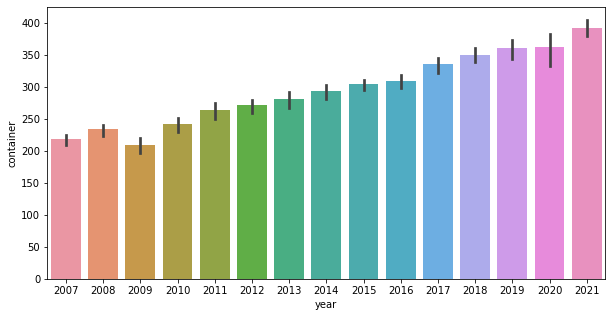

In [50]:
# 연도별 물동량
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='year', y = 'container')

<AxesSubplot:xlabel='year', ylabel='container'>

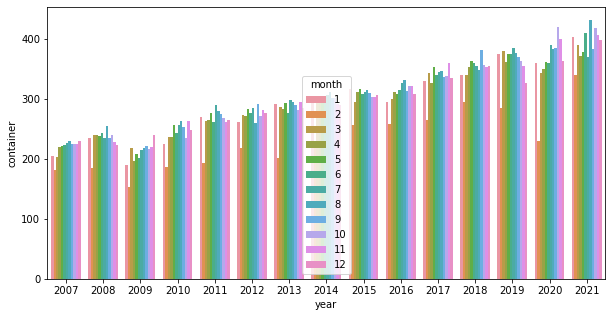

In [51]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='year', y = 'container',hue='month')

<AxesSubplot:xlabel='month', ylabel='container'>

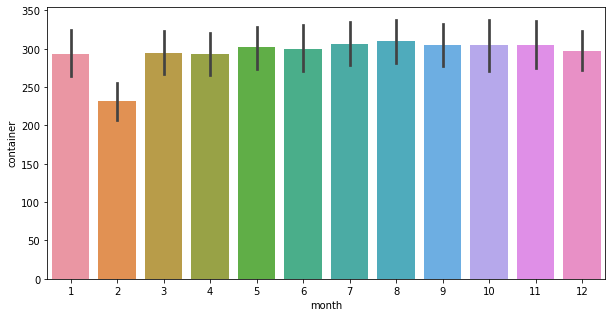

In [52]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='month', y = 'container')

<AxesSubplot:xlabel='month', ylabel='container'>

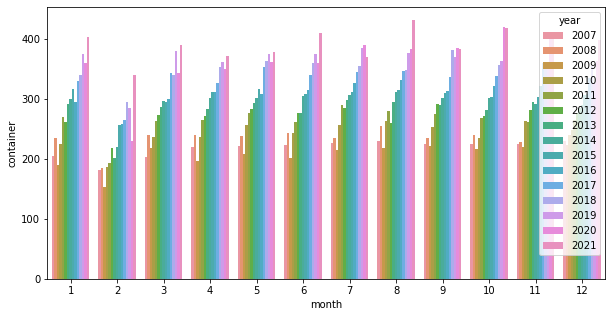

In [53]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='month', y = 'container',hue='year')

<AxesSubplot:xlabel='month', ylabel='container'>

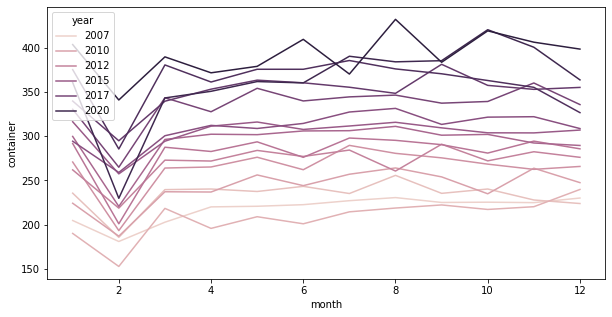

In [54]:
# 월별 물동량
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x='month', y = 'container',hue='year')

<AxesSubplot:xlabel='year', ylabel='container'>

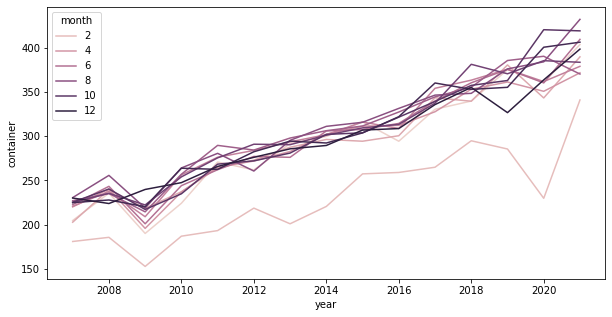

In [55]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x='year', y = 'container',hue='month')

<AxesSubplot:xlabel='year', ylabel='container'>

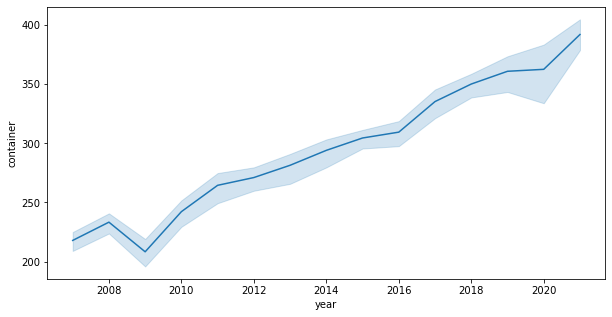

In [56]:
# 전체적인 추세
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x='year', y = 'container')

<AxesSubplot:xlabel='month', ylabel='container'>

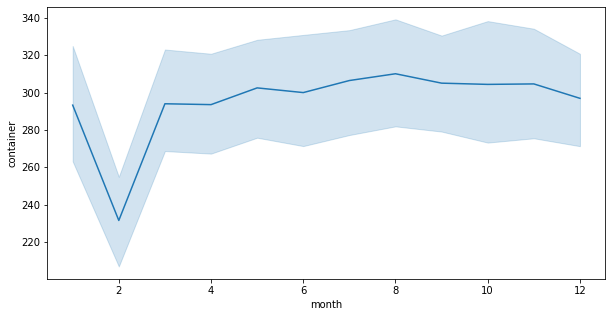

In [57]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x='month', y = 'container')

<AxesSubplot:xlabel='year', ylabel='container'>

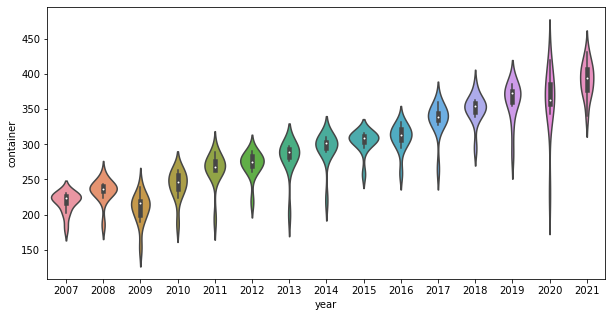

In [58]:
plt.figure(figsize=(10,5))
sns.violinplot(data=df, x='year', y = 'container')

<AxesSubplot:xlabel='year', ylabel='container'>

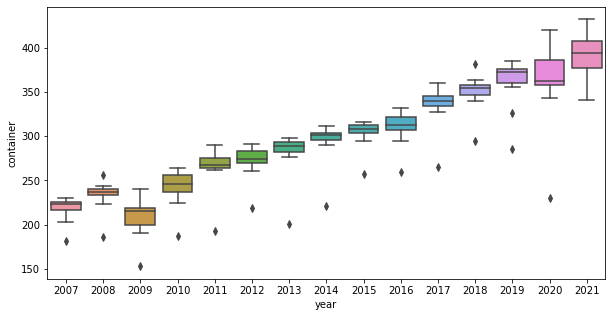

In [59]:
 plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='year', y = 'container')

<AxesSubplot:xlabel='month', ylabel='container'>

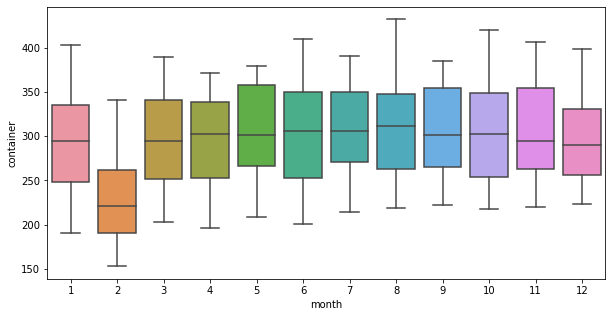

In [61]:
 plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='month', y = 'container')

<AxesSubplot:xlabel='year', ylabel='container'>

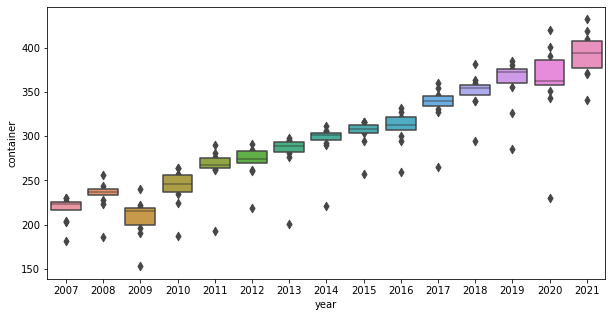

In [60]:
 plt.figure(figsize=(10,5))
sns.boxenplot(data=df, x='year', y = 'container')

<AxesSubplot:xlabel='year', ylabel='container'>

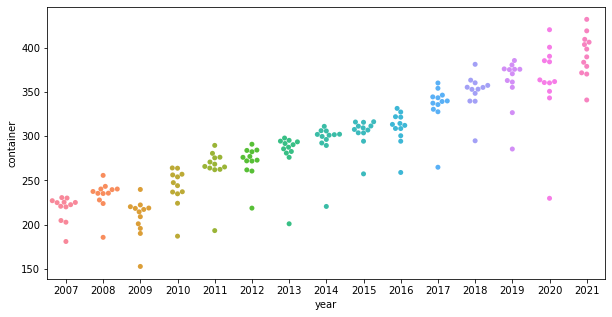

In [62]:
 plt.figure(figsize=(10,5))
sns.swarmplot(data=df, x='year', y = 'container')

# pivot

In [63]:
df

,container,Total,year,month
date,,,,
2007-01-01,204.7,2828.2,2007,1
2007-02-01,181.0,2512.5,2007,2
2007-03-01,202.8,2850.2,2007,3
2007-04-01,220.1,3027.7,2007,4
2007-05-01,220.8,3139.4,2007,5
...,...,...,...,...
2021-08-01,432.0,4985.8,2021,8
2021-09-01,383.5,4303.8,2021,9
2021-10-01,419.0,4617.2,2021,10


<AxesSubplot:ylabel='date'>

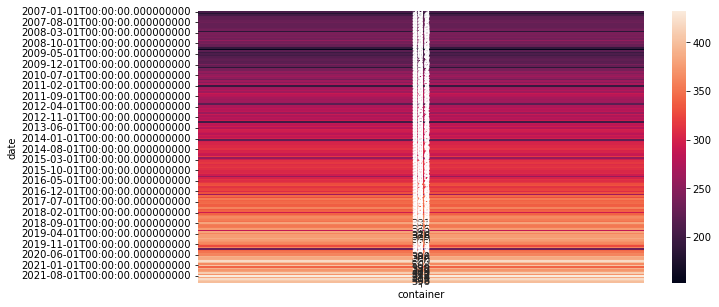

In [65]:
plt.figure(figsize=(10,5))
sns.heatmap(df.container.to_frame(), annot=True, fmt='.0f')

In [66]:
df.pivot(index='year',columns='month', values='container')

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2007,204.7,181.0,202.8,220.1,220.8,222.6,227.1,230.6,225.1,225.4,224.9,230.1
2008,235.6,185.7,239.6,240.3,237.5,243.3,235.2,255.7,235.4,240.3,227.9,223.9
2009,190.1,152.8,218.4,195.8,209.0,201.0,214.5,218.8,222.3,217.2,220.3,239.8
2010,224.2,187.0,237.2,236.9,256.2,244.1,257.0,264.1,254.0,234.9,263.8,247.5
2011,270.8,193.3,264.0,265.2,276.2,262.1,289.6,280.6,275.5,268.4,262.5,265.8
2012,261.9,218.7,272.9,271.9,283.9,277.1,284.3,260.6,290.9,272.1,282.4,276.1
2013,291.7,201.0,287.5,282.7,293.6,276.1,297.9,295.3,290.4,280.9,294.4,285.7
2014,299.7,220.6,296.3,302.2,301.7,305.9,306.2,311.1,301.1,302.0,292.3,289.5
2015,316.3,257.4,294.3,311.3,316.0,307.6,311.5,315.7,309.4,303.8,303.7,306.9


<AxesSubplot:xlabel='month', ylabel='year'>

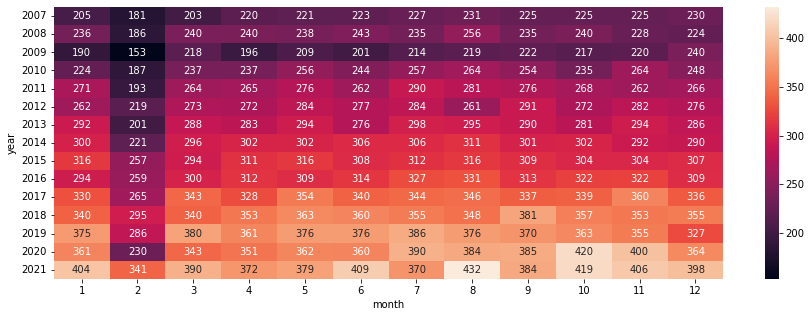

In [68]:
plt.figure(figsize=(15,5))
sns.heatmap(df.pivot(index='year',columns='month', values='container'), annot=True, fmt='.0f')

<AxesSubplot:xlabel='container', ylabel='Count'>

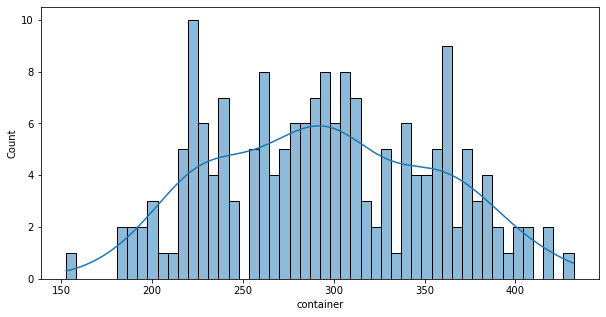

In [74]:
plt.figure(figsize=(10,5))
sns.histplot(df['container'],bins=50, kde=True)